<a href="https://colab.research.google.com/github/danilasar/transformers/blob/main/transformers_demo_%D0%A1%D0%93%D0%A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers bitsandbytes>=0.39.0 accelerate sentencepiece onnx -q

In [ ]:
import torch
from transformers import AutoModel

In [ ]:
bert = AutoModel.from_pretrained("bert-base-uncased")

In [ ]:
bert

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [ ]:
dummy_input = torch.ones(32,128, dtype=torch.int64)  # 32 предложения длиной в 128 токенов -- тут просто 1
torch.onnx.export(bert, dummy_input, 'bert.onnx') # model, input, name_model_tosave

============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



Some of the currently available pipelines are:

* feature-extraction (get the vector representation of a text)
* fill-mask
* ner (named entity recognition)
* question-answering
* sentiment-analysis
* summarization
* text-generation
* translation
* zero-shot-classification

## NLP models

Sentiment Analysis

In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
classifier("I love cats")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': 'POSITIVE', 'score': 0.9995536208152771}]

In [ ]:
classifier(
    ["I've been waiting for a HuggingFace course my whole life.", "I hate this so much!"]
)

[{'label': 'POSITIVE', 'score': 0.9598049521446228},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]

Zero-shot classification

In [ ]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification")
classifier(
"This is a course about the Transformers library",
candidate_labels=["education", "politics", "business"],
)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'sequence': 'This is a course about the Transformers library',
 'labels': ['education', 'business', 'politics'],
 'scores': [0.8445995450019836, 0.11197379976511002, 0.04342666268348694]}

Mask filling

In [ ]:
from transformers import pipeline

unmasker = pipeline("fill-mask")
unmasker("This course will teach you all about <mask> models.", top_k=2)

No model was supplied, defaulted to distilroberta-base and revision ec58a5b (https://huggingface.co/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'score': 0.1961982101202011,
  'token': 30412,
  'token_str': ' mathematical',
  'sequence': 'This course will teach you all about mathematical models.'},
 {'score': 0.040527306497097015,
  'token': 38163,
  'token_str': ' computational',
  'sequence': 'This course will teach you all about computational models.'}]

Named entity recognition

In [ ]:
from transformers import pipeline

ner = pipeline("ner", grouped_entities=True)
ner("My name is Sylvain and I work at Hugging Face in Brooklyn.")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


/usr/local/lib/python3.10/dist-packages/transformers/pipelines/token_classification.py:169: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  warnings.warn(


[{'entity_group': 'PER',
  'score': 0.9981694,
  'word': 'Sylvain',
  'start': 11,
  'end': 18},
 {'entity_group': 'ORG',
  'score': 0.9796019,
  'word': 'Hugging Face',
  'start': 33,
  'end': 45},
 {'entity_group': 'LOC',
  'score': 0.9932106,
  'word': 'Brooklyn',
  'start': 49,
  'end': 57}]

Question answering

In [ ]:
from transformers import pipeline

question_answerer = pipeline("question-answering")
question_answerer(
question="Where do I work?",
context="My name is Anna and I work at Central Bank of Russian Federation in Moscow",
)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


{'score': 0.659591794013977,
 'start': 30,
 'end': 64,
 'answer': 'Central Bank of Russian Federation'}

Summarization

In [ ]:
from transformers import pipeline

summarizer = pipeline("summarization")
summarizer(
"""
America has changed dramatically during recent years. Not only has the number of
graduates in traditional engineering disciplines such as mechanical, civil,
electrical, chemical, and aeronautical engineering declined, but in most of
the premier American universities engineering curricula now concentrate on
and encourage largely the study of engineering science. As a result, there
are declining offerings in engineering subjects dealing with infrastructure,
the environment, and related issues, and greater concentration on high
technology subjects, largely supporting increasingly complex scientific
developments. While the latter is important, it should not be at the expense
of more traditional engineering.

Rapidly developing economies such as China and India, as well as other
industrial countries in Europe and Asia, continue to encourage and advance
the teaching of engineering. Both China and India, respectively, graduate
six and eight times as many traditional engineers as does the United States.
Other industrial countries at minimum maintain their output, while America
suffers an increasingly serious decline in the number of engineering graduates
and a lack of well-educated engineers.
"""
)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'summary_text': ' The number of engineering graduates in the United States has declined in recent years . China and India graduate six and eight times as many traditional engineers as does the U.S. The U.N. has an increasingly serious decline in the number of engineers and a lack of well-educated engineers . There are declining offerings in engineering subjects dealing with infrastructure, environment, and related issues .'}]

Translation

In [ ]:
from transformers import pipeline

translator = pipeline("translation", model="Helsinki-NLP/opus-mt-fr-en")
translator("Cette voiture est produite par le groupe Volkswagen.")

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


[{'translation_text': 'This car is produced by the Volkswagen Group.'}]

[Полный список пайплайнов](https://huggingface.co/docs/transformers/main_classes/pipelines)

## LLM

Text generation

In [ ]:
from transformers import AutoModelForCausalLM

In [ ]:
model = AutoModelForCausalLM.from_pretrained(
"openlm-research/open_llama_7b", device_map="auto", load_in_4bit=True
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/507 [00:00<?, ?B/s]

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


pytorch_model.bin.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

pytorch_model-00001-of-00002.bin:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/28.1k [00:00<?, ?B/s]

pytorch_model-00002-of-00002.bin:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

In [ ]:
model = AutoModelForCausalLM.from_pretrained(
"bigscience/bloom-3b", device_map="auto", load_in_4bit=True
)

In [ ]:
from transformers import AutoTokenizer

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("bigscience/bloom-3b")
model_inputs = tokenizer(["Five interesting facts about France are"], return_tensors="pt").to("cuda")
generated_ids = model.generate(**model_inputs, max_new_tokens=100)
tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]

/usr/local/lib/python3.10/dist-packages/bitsandbytes/nn/modules.py:224: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_type=torch.float32 (default). This will lead to slow inference or training speed.
  warnings.warn(f'Input type into Linear4bit is torch.float16, but bnb_4bit_compute_type=torch.float32 (default). This will lead to slow inference or training speed.')


'Five interesting facts about France are that it is the largest country in Europe, the second largest in the world, and the third largest in the world in terms of population. It is also the most populous country in Europe, with a population of about 47 million people. It is also the most populous country in the world in terms of population. It is also the most populous country in the world in terms of population. It is also the most populous country in the world in terms of population. It is also the'

### Task

**My task:** Найдите на Huggingface Hub модель, подходящую для задачи генерации ответов на вопросы и обученную на Википедии. Создайте gradio приложение для ответов на вопросы с полем для ввода текста и полем для вывода ответа. Для демонстрации работы приложения отправьте в приложение статью из Википедии и придумайте 2 вопроса по этой статье (ссылку на статью и свои вопросы укажите в блокноте). Получите ответы на вопросы. Как можно добиться того, чтобы приложение лучше отвечало на вопросы (свой ответ укажите в блокноте)?

In [ ]:
!pip install datasets evaluate transformers[sentencepiece]
!pip install gradio

In [ ]:
from transformers import pipeline
import gradio as gr

In [ ]:
model_id = "bert-large-uncased-whole-word-masking-finetuned-squad"
model_qa = pipeline("question-answering", model=model_id)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/443 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
def answer_question(context, question):
    result = model_qa(context=context, question=question)
    return result['answer']

In [ ]:
qa_face = gr.Interface(fn = answer_question,
                     inputs=["text", "text"],
                     outputs="text")
qa_face.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://94e85c0325fb669971.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Я выбрала статью про [Рай](https://en.wikipedia.org/wiki/Paradise).  
Мои вопросы к данной статье:  
1. Who goes to heaven?  
Ответ: the virtuous dead  
2. At what time was paradise the most popular theme in art?  
pre-Enlightenment era  

Как видно, модель довольно хорошо отвечает на вопросы. Но как же можно ее улучшить? Тут 2 выхода:  
1 - fine-tuning модели, то есть улучшаем модель через подбор лучших параметров,   
2 - улучшаем вопросы человека, то есть обучаем его строить более емкие и четкие вопросы

## Audio

**My task:** Загрузите пример "Tchaikovsky - Dance of the Sugar Plum Fairy" из библиотеки librosa. Постройте waveform, частотный спектр и спектрограмму этого аудиофрагмента. Найдите на Huggingface Hub модель, подходящую для классификации музыкальных фрагментов по жанрам, соберите пайплайн, определите жанр. Если жанр определяется неверно, напишите, что можно сделать, чтобы улучшить ситуацию (свой ответ укажите в блокноте).

In [ ]:
!pip install librosa
!pip install torch
!pip install torchaudio
!pip install transformers

In [ ]:
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

In [ ]:
audio_path = librosa.example('nutcracker')
array, sampling_rate = librosa.load(audio_path)

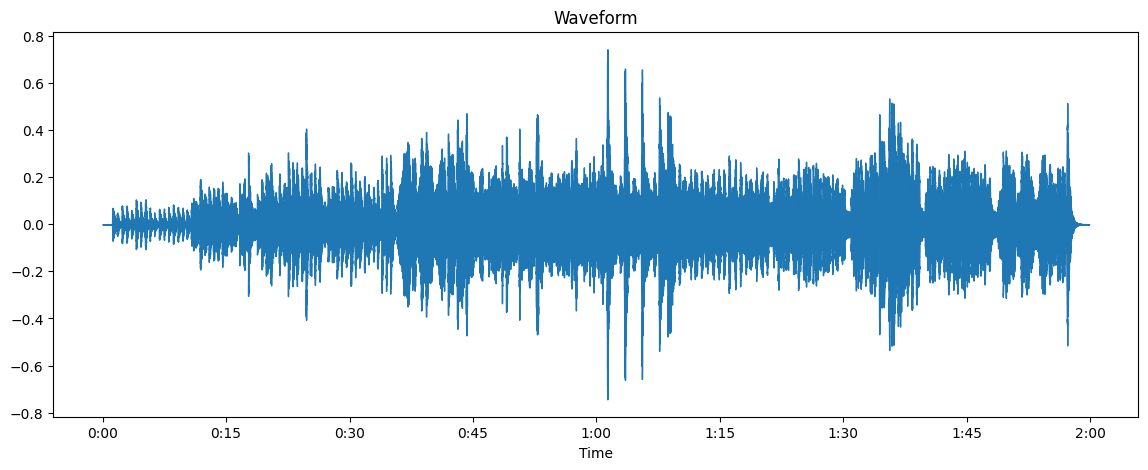

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(array, sr=sampling_rate)
plt.title('Waveform')
plt.show()

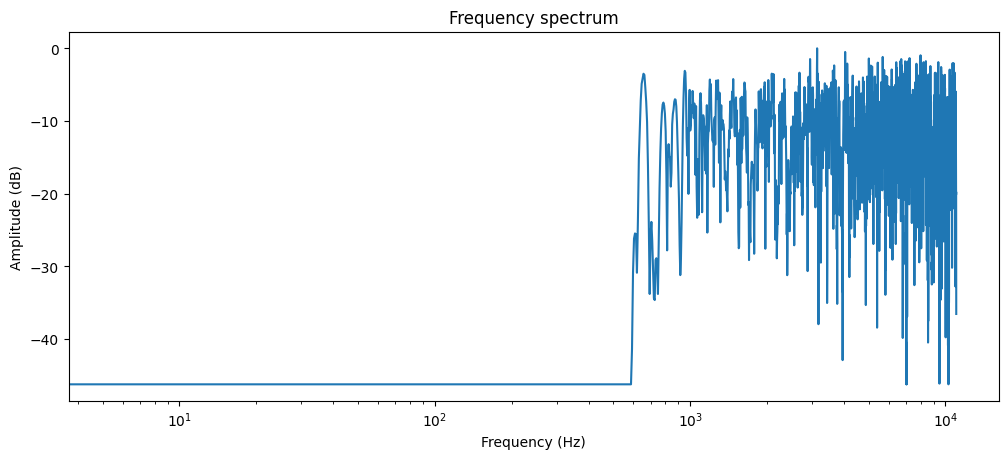

In [ ]:
dft_input = array[:4096] # roughly the length of the first note being played

# calculate the DFT
window = np.hanning(len(dft_input))
windowed_input = dft_input * window
dft = np.fft.rfft(windowed_input) # "r" means "real input"

# get the amplitude spectrum in decibels
amplitude = np.abs(dft)
amplitude_db = librosa.amplitude_to_db(amplitude, ref=np.max)

# get the frequency bins
frequency = librosa.fft_frequencies(sr=sampling_rate, n_fft=len(dft_input))

plt.figure().set_figwidth(12)
plt.plot(frequency, amplitude_db)
plt.title('Frequency spectrum')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.xscale("log")

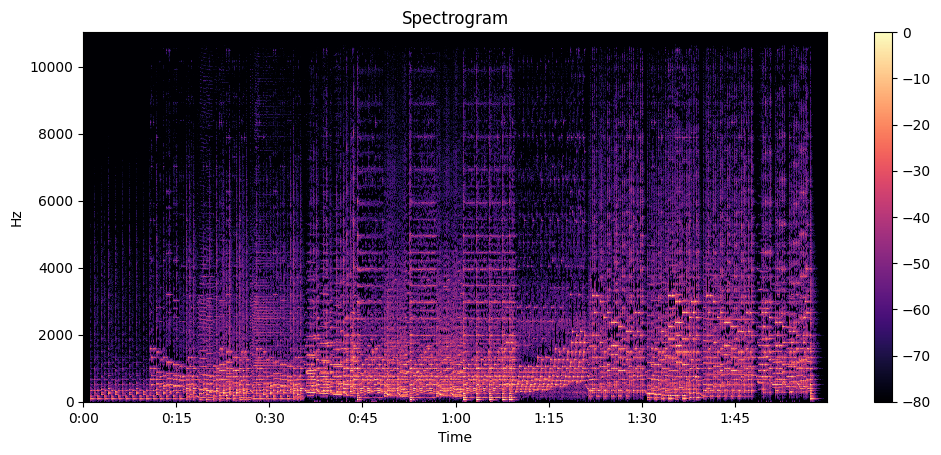

In [ ]:
D = librosa.stft(array) # Short Time Fourier Transform; segments of 2048 samples
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_db, x_axis="time", y_axis="hz")
plt.title('Spectrogram')
plt.colorbar()

In [ ]:
from transformers import pipeline

model_id = "mtg-upf/discogs-maest-30s-pw-73e-ts"
pipe = pipeline("audio-classification", model=model_id)

config.json:   0%|          | 0.00/27.6k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/347M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/476 [00:00<?, ?B/s]

The repository for mtg-upf/discogs-maest-30s-pw-73e-ts contains custom code which must be executed to correctly load the model. You can inspect the repository content at https://hf.co/mtg-upf/discogs-maest-30s-pw-73e-ts.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


feature_extraction_maest.py:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/mtg-upf/discogs-maest-30s-pw-73e-ts:
- feature_extraction_maest.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
result = pipe(audio_path)
for pred in result:
  print(pred['label'], pred['score'])

Stage & Screen---Soundtrack 0.20087476074695587
Stage & Screen---Score 0.0743214562535286
Classical---Modern 0.03388172388076782
Jazz---Easy Listening 0.027915222570300102
Jazz---Swing 0.024127215147018433


Как видно, результат не настолько хорош, как могло бы быть, однако классическая музыка на 3 месте, что тоже неплохо уже!  
Как улучшить? Думаю, есть 2 пути:  
1) Использовать более крупные модели или, по крайней мере, больше обученные на классической музыке.  
2) Fine-tuning :) Настраивать параметры модели для лучшей классификации на нужных нам данных.

## Image

In [ ]:
import gradio as gr
from transformers import pipeline
pipe = pipeline("image-classification")
gr.Interface.from_pipeline(pipe).launch()

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 3f49326 (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://35cea082fe5a13fe7e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
